In [10]:
# Import dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Import dataset
df = pd.read_csv('Resources/customer_data.csv')
df.head()

,id,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at_home_approx,avg_yearly_income,num_children_at_home,store_city,store_state,media_type,cost,promotion_name,store_sales_in_millions
0,0,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,10000,1.0,Salem,OR,"Daily Paper, Radio",126.62,Bag Stuffers,7.36
1,1,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,50000,0.0,Salem,OR,"Daily Paper, Radio",59.86,Cash Register Lottery,5.52
2,2,S,F,4.0,Partial High School,Normal,Manual,N,1.0,10000,0.0,Salem,OR,"Daily Paper, Radio",84.16,High Roller Savings,3.68
3,3,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,30000,2.0,Salem,OR,In-Store Coupon,95.78,Cash Register Lottery,3.68
4,4,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,30000,0.0,Salem,OR,Radio,50.79,Double Down Sale,4.08


In [12]:
# Check data frame shape
shape = df.shape
print(f"Store dataset including {shape[0]} rows and {shape[1]} cloumns.")

Store dataset including 38892 rows and 17 cloumns.


In [13]:
# Check data frame columns
df.columns

Index(['id', 'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at_home_approx',
       'avg_yearly_income', 'num_children_at_home', 'store_city',
       'store_state', 'media_type', 'cost', 'promotion_name',
       'store_sales_in_millions'],
      dtype='object')

### GM Note: Should 'store_sales_in_millions' stay in Cust dataset?

In [14]:
# Generate a categorical variable list
cat = df.dtypes[df.dtypes == 'object'].index.tolist()
cat

['marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'store_city',
 'store_state',
 'media_type',
 'promotion_name']

In [15]:
# Count the number of categorical variables.
print(f"There are {len(cat)} categorical variables in whole data frame.")

There are 10 categorical variables in whole data frame.


In [16]:
# Generate a numerical variable list
int_float = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].index.tolist()
int_float

['id',
 'total_children',
 'avg_cars_at_home_approx',
 'avg_yearly_income',
 'num_children_at_home',
 'cost',
 'store_sales_in_millions']

In [17]:
# Count the number of numerical variables.
print(f"There are {len(int_float)} numerical variables in whole data frame.")

There are 7 numerical variables in whole data frame.


In [18]:
# Select columns from customer table.
customer_cols = ['marital_status', 'gender', 'total_children', 'education',\
       'member_card', 'occupation', 'houseowner', 'avg_cars_at_home_approx',\
       'avg_yearly_income', 'num_children_at_home', 'store_city',\
       'store_state', 'media_type', 'cost', 'promotion_name',
       'store_sales_in_millions']

In [19]:
# Display customer data frame.
customer_df = df[customer_cols]
print(f"Shape: {df.shape}")
customer_df.head()

Shape: (38892, 17)


,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at_home_approx,avg_yearly_income,num_children_at_home,store_city,store_state,media_type,cost,promotion_name,store_sales_in_millions
0,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,10000,1.0,Salem,OR,"Daily Paper, Radio",126.62,Bag Stuffers,7.36
1,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,50000,0.0,Salem,OR,"Daily Paper, Radio",59.86,Cash Register Lottery,5.52
2,S,F,4.0,Partial High School,Normal,Manual,N,1.0,10000,0.0,Salem,OR,"Daily Paper, Radio",84.16,High Roller Savings,3.68
3,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,30000,2.0,Salem,OR,In-Store Coupon,95.78,Cash Register Lottery,3.68
4,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,30000,0.0,Salem,OR,Radio,50.79,Double Down Sale,4.08


In [20]:
# Use LabelEncoder to encode categorical columns.
label_encoder = LabelEncoder()

# selected_store_df.loc[:,selected_cat] = label_encoder.fit_transform(selected_store_df.loc[:,selected_cat])
for var in cat:
    customer_df[var] = label_encoder.fit_transform(customer_df[var])

customer_df

/Users/giannimarco/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at_home_approx,avg_yearly_income,num_children_at_home,store_city,store_state,media_type,cost,promotion_name,store_sales_in_millions
0,0,0,1.0,4,2,4,1,1.0,10000,1.0,5,1,3,126.62,0,7.36
1,0,1,0.0,0,3,3,1,4.0,50000,0.0,5,1,3,59.86,6,5.52
2,1,0,4.0,4,2,2,0,1.0,10000,0.0,5,1,3,84.16,18,3.68
3,0,0,2.0,2,0,2,1,2.0,30000,2.0,5,1,5,95.78,6,3.68
4,0,1,0.0,4,0,4,0,2.0,30000,0.0,5,1,7,50.79,11,4.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,1,0,2.0,2,0,3,1,3.0,130000,0.0,6,0,1,127.19,17,0.99
38888,1,0,1.0,4,0,4,0,2.0,50000,0.0,6,0,10,78.45,45,1.21
38889,0,0,1.0,4,2,4,1,1.0,10000,1.0,6,0,5,95.25,48,2.76
38890,1,0,2.0,2,0,4,0,2.0,30000,0.0,6,0,9,69.42,24,1.60


In [21]:
# Check new data frame infomation.
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38892 entries, 0 to 38891
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marital_status           38892 non-null  int64  
 1   gender                   38892 non-null  int64  
 2   total_children           38892 non-null  float64
 3   education                38892 non-null  int64  
 4   member_card              38892 non-null  int64  
 5   occupation               38892 non-null  int64  
 6   houseowner               38892 non-null  int64  
 7   avg_cars_at_home_approx  38892 non-null  float64
 8   avg_yearly_income        38892 non-null  int64  
 9   num_children_at_home     38892 non-null  float64
 10  store_city               38892 non-null  int64  
 11  store_state              38892 non-null  int64  
 12  media_type               38892 non-null  int64  
 13  cost                     38892 non-null  float64
 14  promotion_name        

In [22]:
# Check unique values of each column.
customer_df.nunique()


marital_status                2
gender                        2
total_children                6
education                     5
member_card                   4
occupation                    5
houseowner                    2
avg_cars_at_home_approx       5
avg_yearly_income             8
num_children_at_home          6
store_city                   10
store_state                   3
media_type                   13
cost                        214
promotion_name               49
store_sales_in_millions    1011
dtype: int64

In [23]:
# Export dataset as a new csv file.
#customer_df.to_csv('Resources/customer_label_encoded.csv')

## Cost as target

In [24]:
# Split preprocessed data into our features and target arrays
y = customer_df['cost'].values
X = customer_df.drop(columns='cost').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [25]:
# Shapes of splitted data
print(f"X_train: {X_train.shape};")
print(f"X_test: {X_test.shape};")
print(f"y_train: {y_train.shape};")
print(f"y_test: {y_test.shape};")

X_train: (29169, 15);
X_test: (9723, 15);
y_train: (29169,);
y_test: (9723,);


In [26]:
# Fit the model
mlg = LinearRegression()
mlg.fit(X_train, y_train)


LinearRegression()

In [27]:
# Predict the result
y_pred = mlg.predict(X_test)
y_pred

array([101.75680088,  99.61796074,  98.83926354, ...,  95.6034649 ,
        96.79343709, 101.49705231])

In [28]:
# Evaluate the model
accuracy = r2_score(y_test, y_pred) 
print(f"Accuracy of multiple linear regression is {accuracy:.2f}.")


Accuracy of multiple linear regression is 0.01.


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

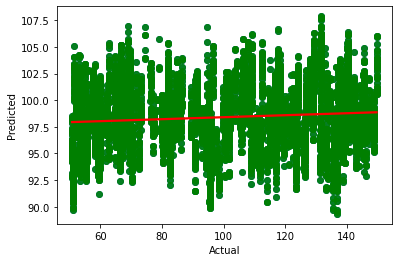

In [31]:
# Plot the result 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "green"}, line_kws={"color": "red"})

## GM Note: Changed colors

## Store sales as target

In [32]:
# Split preprocessed data into our features and target arrays
y = customer_df['store_sales_in_millions'].values
X = customer_df.drop(columns='store_sales_in_millions').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
# Shapes of splitted data
print(f"X_train: {X_train.shape};")
print(f"X_test: {X_test.shape};")
print(f"y_train: {y_train.shape};")
print(f"y_test: {y_test.shape};")

X_train: (29169, 15);
X_test: (9723, 15);
y_train: (29169,);
y_test: (9723,);


In [34]:
# Fit the model
mlg = LinearRegression()
mlg.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict the result
y_pred = mlg.predict(X_test)
y_pred

array([6.12846459, 6.7023801 , 6.59565682, ..., 6.81087912, 6.72047357,
       6.70410856])

In [36]:
# Evaluate the model
accuracy = r2_score(y_test, y_pred) 
print(f"Accuracy of multiple linear regression is {accuracy:.2f}.")

Accuracy of multiple linear regression is 0.01.


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

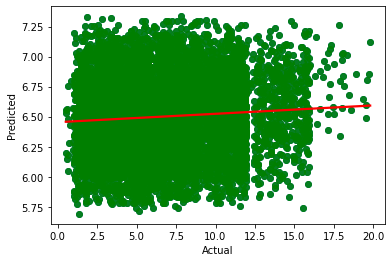

In [37]:
# Plot the result 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "green"}, line_kws={"color": "red"})

In [38]:
# Calculating a correalation matrix
matrix = customer_df.corr(
    method = 'pearson',     # The method of correlation
    min_periods =1          # Min number of observations required
).round(2)
print(matrix)

                         marital_status  gender  total_children  education  \
marital_status                     1.00    0.02           -0.04       0.01   
gender                             0.02    1.00           -0.01      -0.00   
total_children                    -0.04   -0.01            1.00      -0.00   
education                          0.01   -0.00           -0.00       1.00   
member_card                       -0.05    0.01            0.03       0.32   
occupation                        -0.03   -0.01            0.01       0.14   
houseowner                        -0.28   -0.02            0.02      -0.03   
avg_cars_at_home_approx           -0.07    0.01            0.10      -0.34   
avg_yearly_income                 -0.02   -0.01           -0.00      -0.40   
num_children_at_home              -0.64    0.00            0.39       0.01   
store_city                        -0.05   -0.03            0.06       0.00   
store_state                       -0.02   -0.04            0.02 

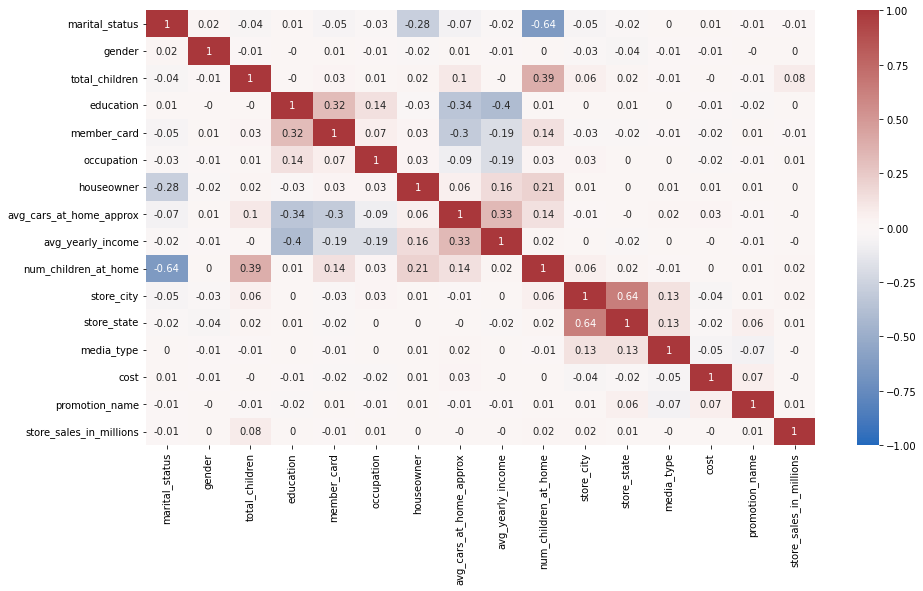

In [39]:
# Visualizing a Pandas correlation matrix using seaborn
plt.figure(figsize = (15,8))
# sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

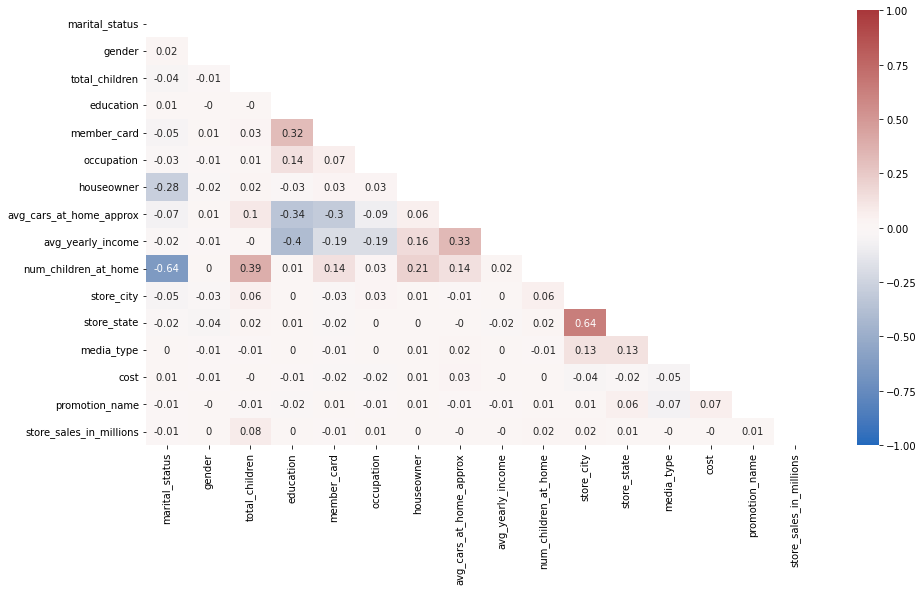

In [40]:
# Show only the bottom half of correclation matrix
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [41]:
# Select only strong correlactions in matrix
strong_matrix = matrix.unstack()
strong_matrix = strong_matrix[abs(strong_matrix) >= 0.7]
print(strong_matrix)


marital_status           marital_status             1.0
gender                   gender                     1.0
total_children           total_children             1.0
education                education                  1.0
member_card              member_card                1.0
occupation               occupation                 1.0
houseowner               houseowner                 1.0
avg_cars_at_home_approx  avg_cars_at_home_approx    1.0
avg_yearly_income        avg_yearly_income          1.0
num_children_at_home     num_children_at_home       1.0
store_city               store_city                 1.0
store_state              store_state                1.0
media_type               media_type                 1.0
cost                     cost                       1.0
promotion_name           promotion_name             1.0
store_sales_in_millions  store_sales_in_millions    1.0
dtype: float64
